# Coder:- Chandra Vijay Kumawat

## Task 4. Exploratory Data Analysis - Terrorism

### Problem Statement:
    
    ● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
    
    ● As a security/defense analyst, try to find out the hot zone of terrorism.
    
    ● What all security issues and insights you can derive by EDA?
      
    Dataset: https://bit.ly/2TK5Xn5

#### Task completed during Data Science & Analytics Internship @The Sparks Foundation

### Importing the libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
import folium
from folium.plugins import MarkerCluster

### Importing the dataset

In [14]:
df=pd.read_csv('C:/Users/ChandraKumawat/Desktop/Spark foundation/globalterrorismdb_0718dist.csv',encoding='latin1')

c:\users\chandrakumawat\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
# make a copy of original dataset

ds=df.copy()
ds.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [16]:
ds.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# checking for null values if exists in columns

ds.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [19]:
ds.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [20]:
ds.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

### US Terror Attacks and Death Injuries.

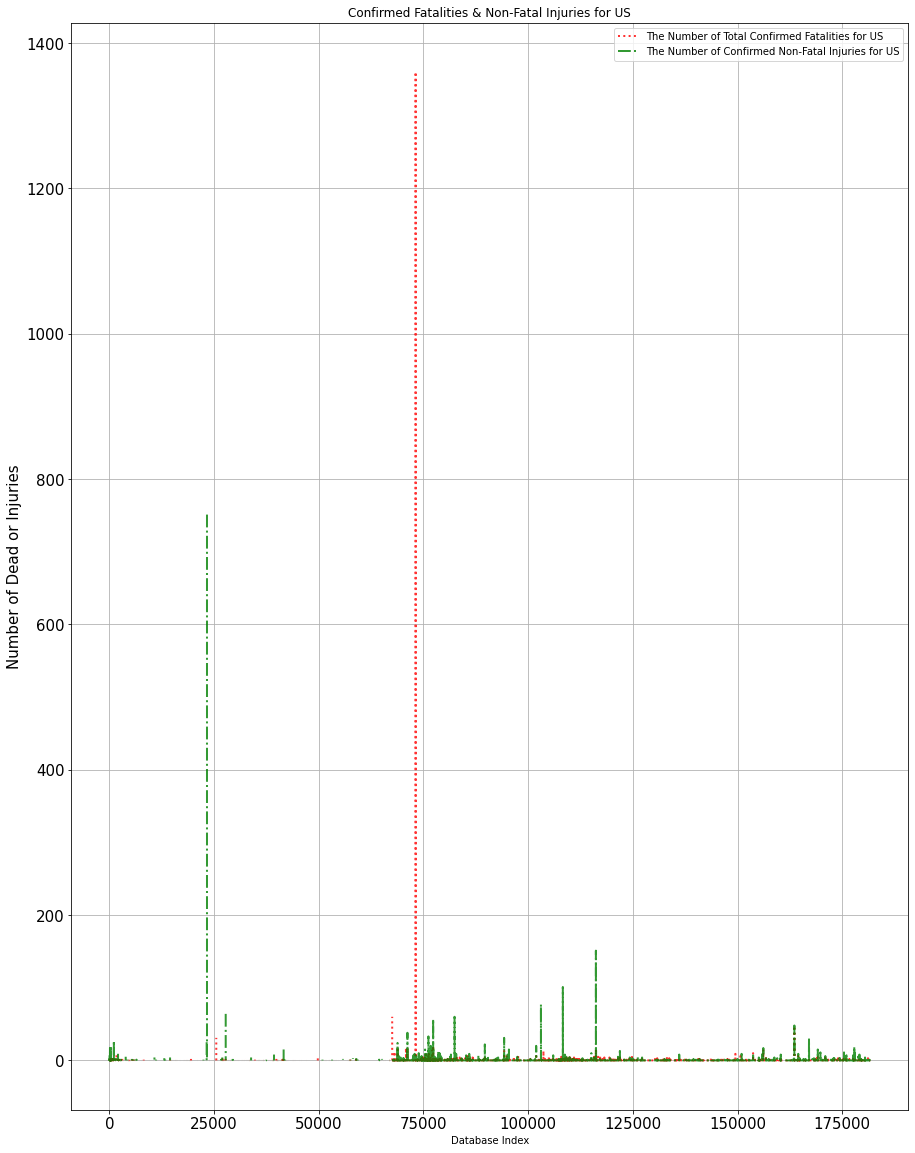

In [21]:
ds.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (15,20), fontsize=15)
ds.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2,alpha = 0.8,grid = True, 
                 linestyle = '-.', figsize = (15,20), fontsize=15)
plt.legend(loc='upper right')
plt.xlabel('Database Index', fontsize=10)     
plt.ylabel('Number of Dead or Injuries', fontsize=15)
plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')  
plt.show()

### Death and Injuries at all time.

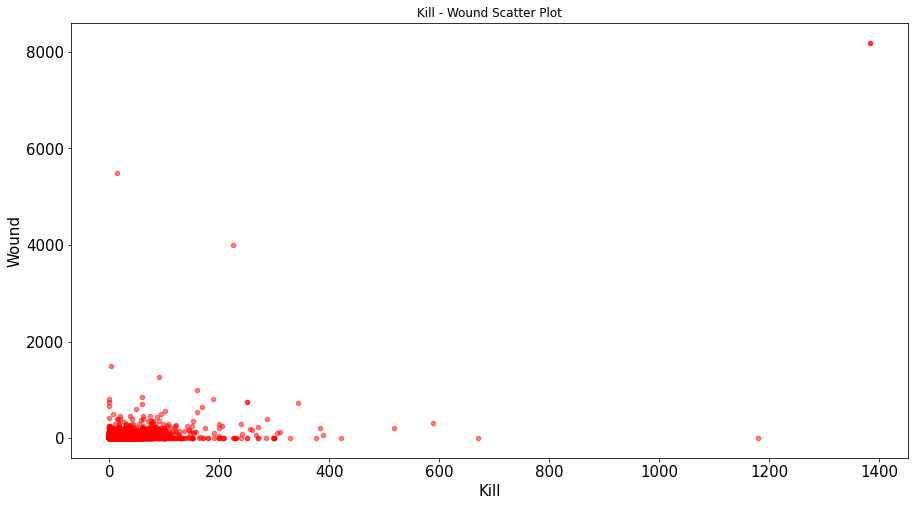

In [22]:
ds.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (15,8), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

### Frequency of Middle East & North Africa Terrorism Actions by Years'

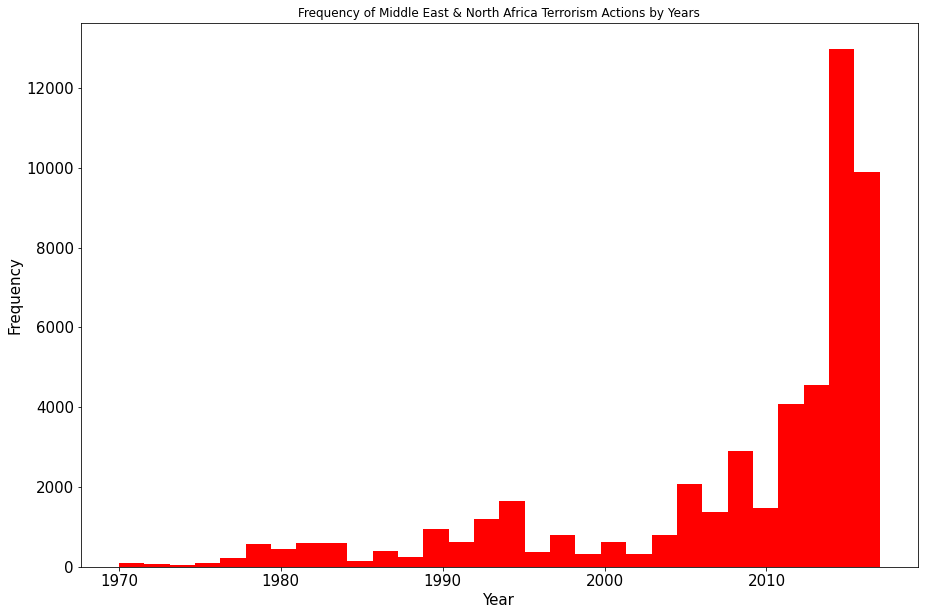

In [23]:
middleEastData = ds[ds['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (15,10), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

###  Comparing those who died in terror attacks in the World and Middle East & North Africa

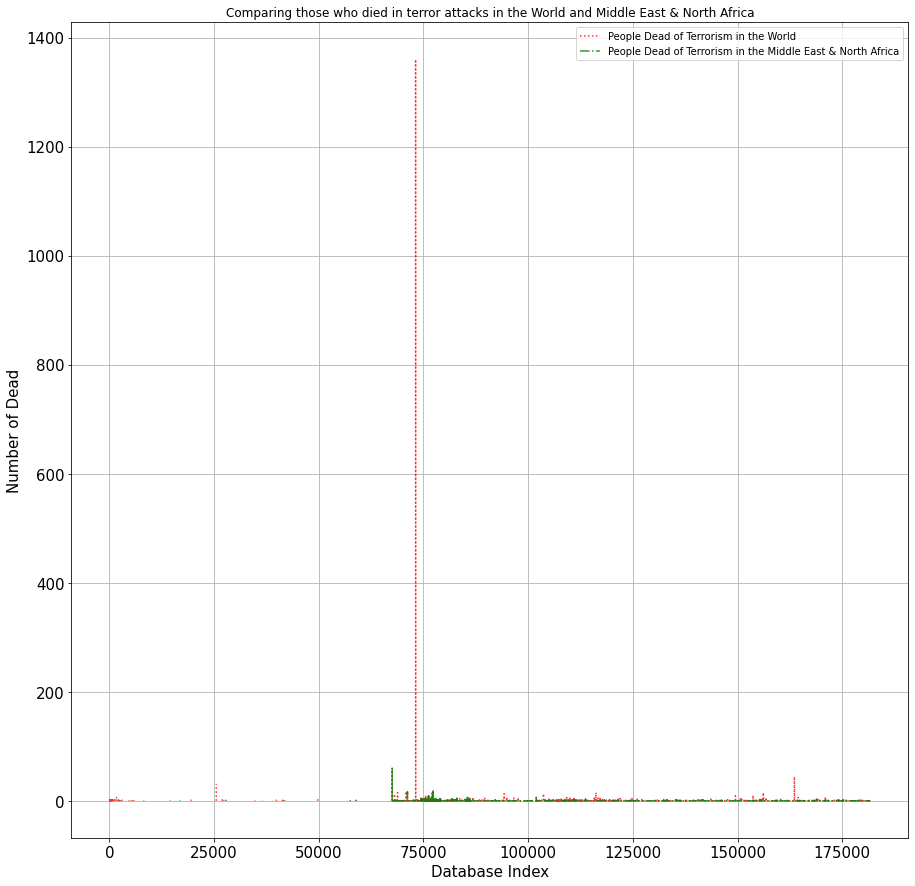

In [24]:
df.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (15,15), fontsize=15)

plt.legend(loc='upper right')     
plt.xlabel('Database Index', fontsize=15)     
plt.ylabel('Number of Dead', fontsize=15)

plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            
plt.show()

### Terrorist Attacks of a Particular year and their Locations.

#### Terrorist acts in the world over a certain year.

In [25]:
filterData = ds[ ds['iyear'] == 1970]
reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()


In [26]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

### Number of people  Killed in Terrorist Attacks by Countries.

In [29]:
countryData = df.loc[:,'country':'country_txt']
killData = df.loc[:,'nkill']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [30]:
countryKillFormatData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 205 entries, Afghanistan to Zimbabwe
dtypes: float64(205)
memory usage: 1.6+ KB


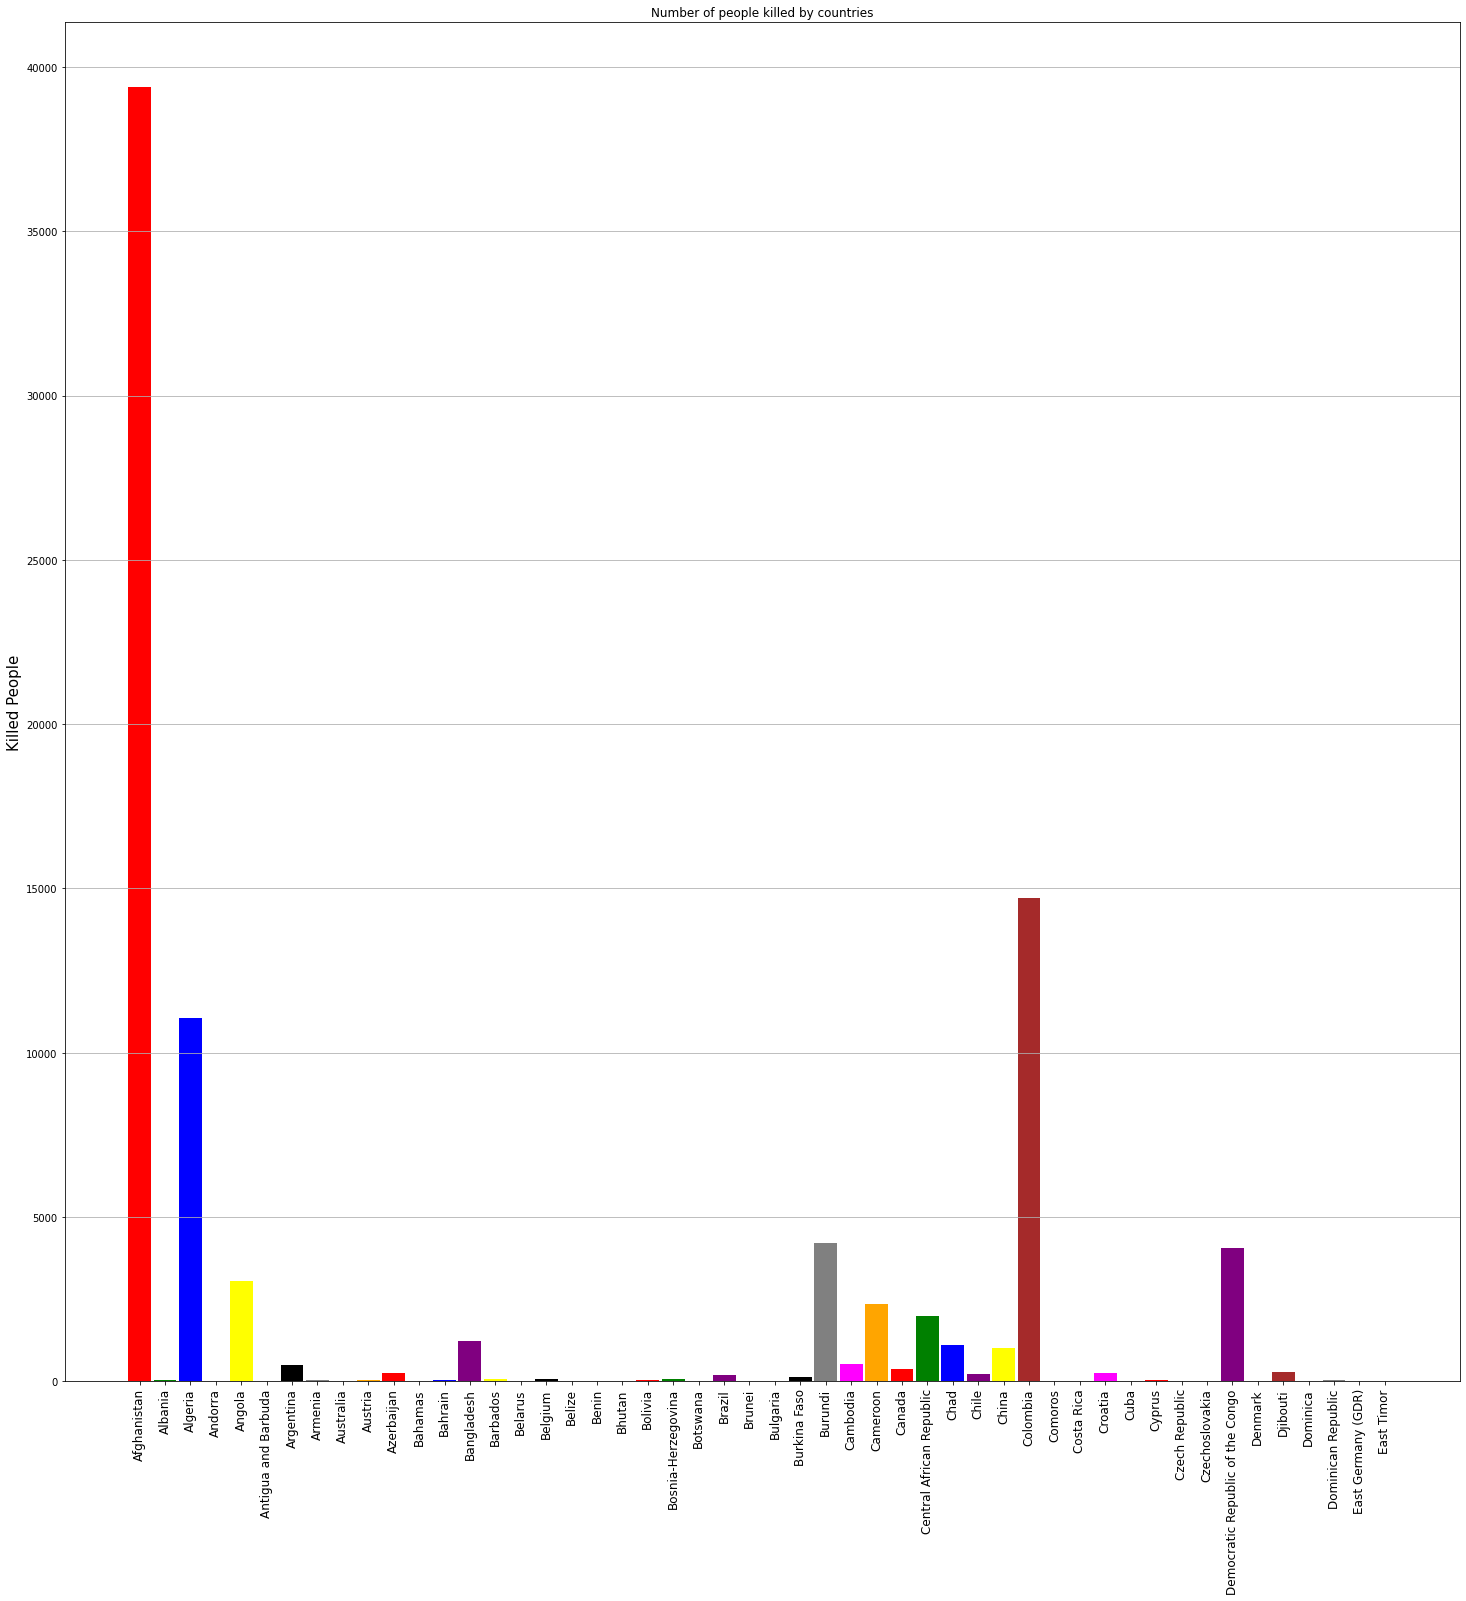

In [31]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
# print(fig_size)
plt.show()

###  Number of people killed by countries

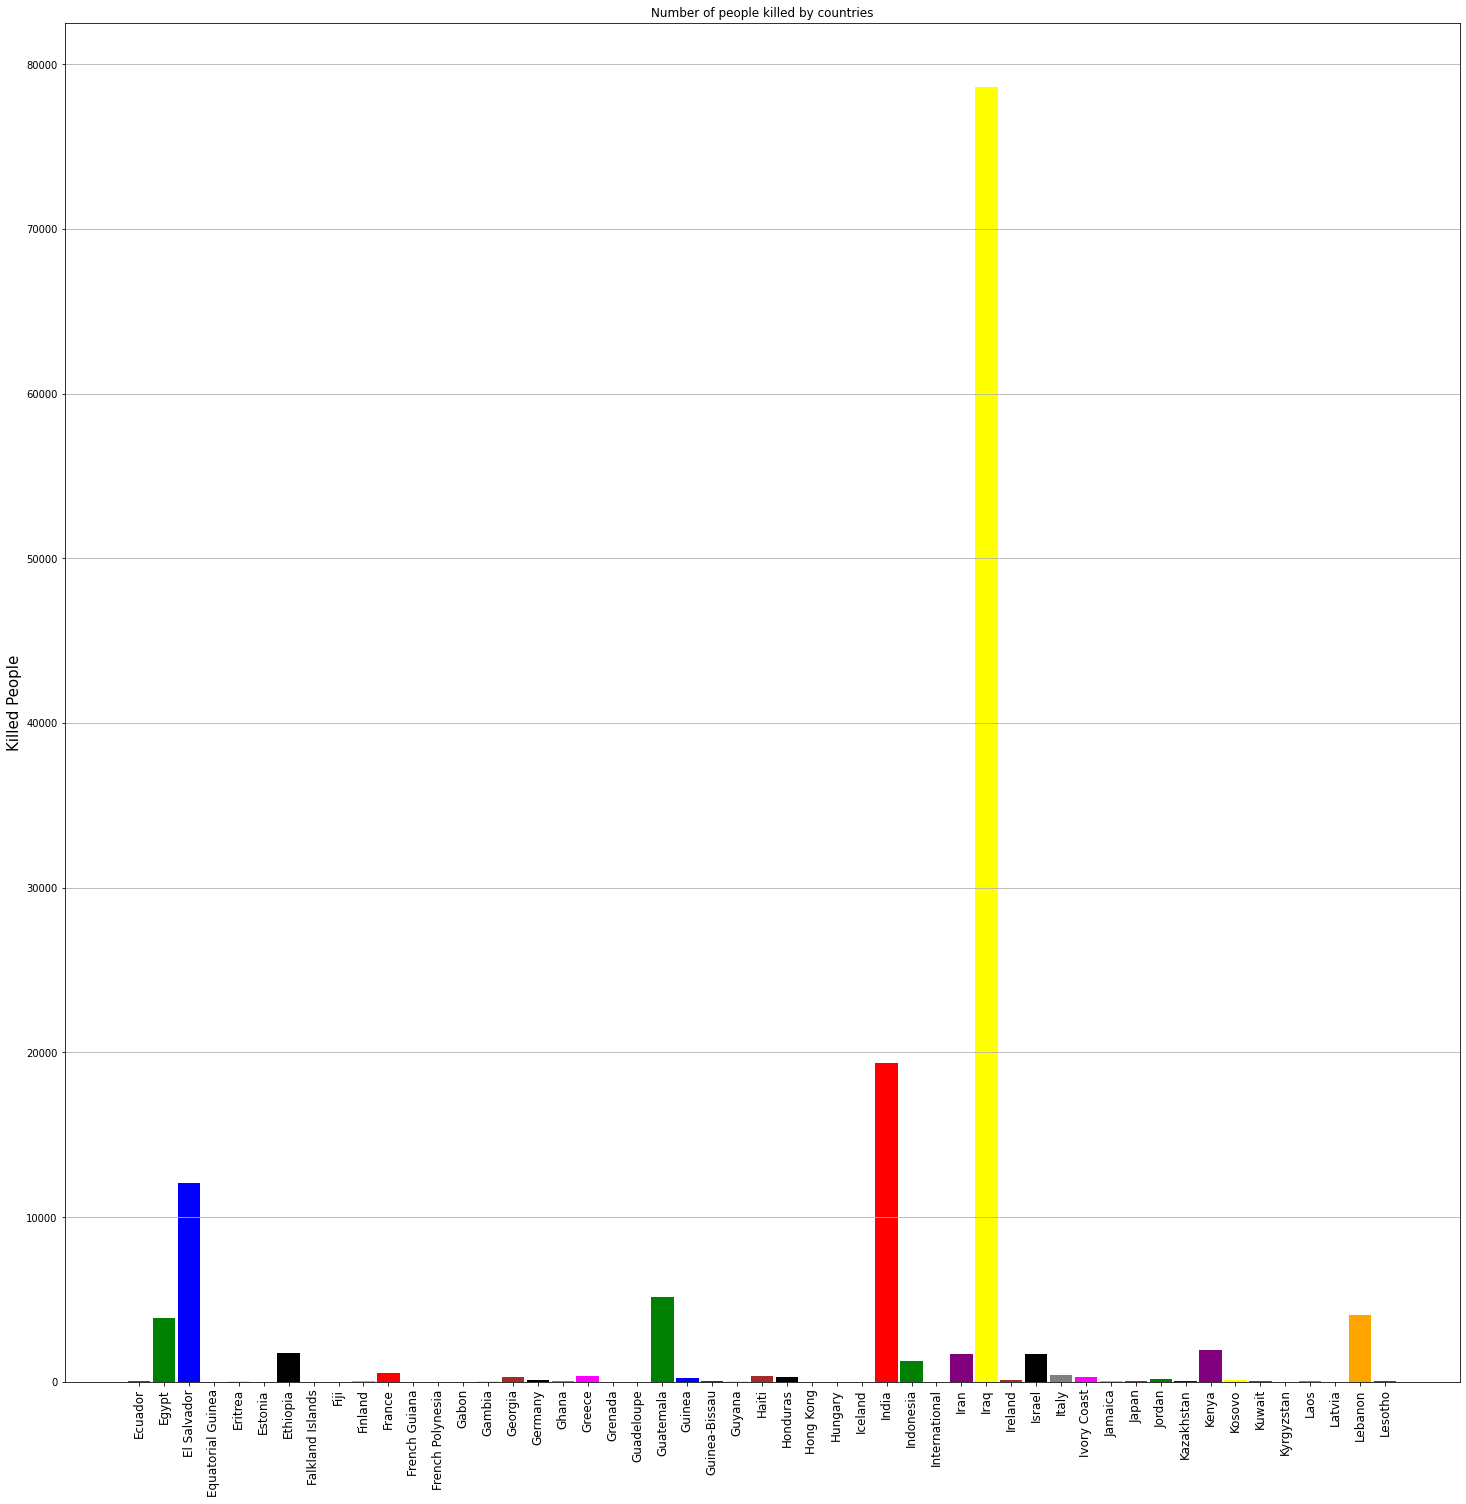

In [32]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

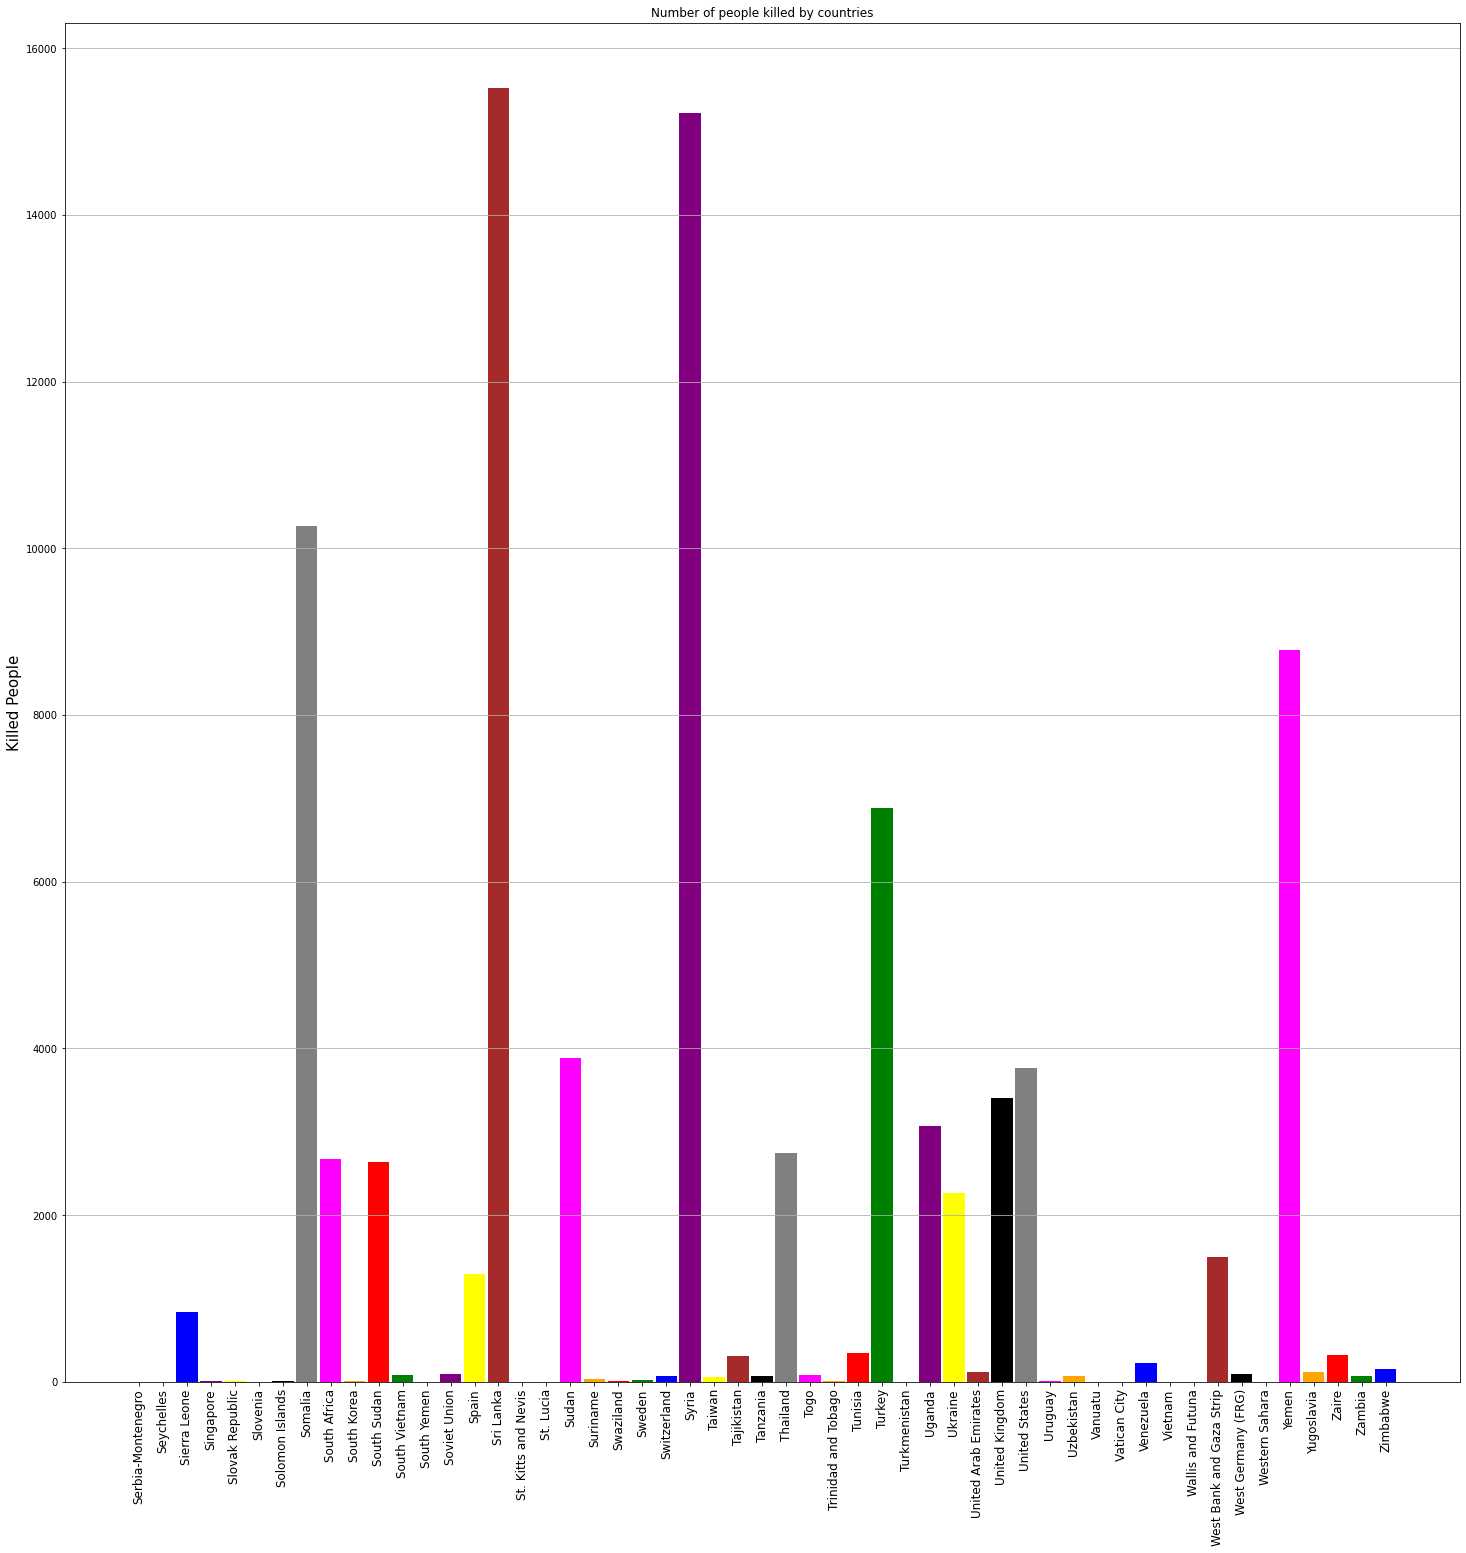

In [33]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

# _________________________EOC____________________________